# Pregunta 1: ¿Cuántos pokemones hay en total?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [3]:
# Project root directory
project_root = Path().resolve().parent.parent.parent
pokemon_data_path = project_root / "retos" / "reto-pokemon-jasonssdev" / "data" / "all_pokemon_data.csv"

In [4]:
df_pokemon = pd.read_csv(pokemon_data_path)
df_pokemon.head()

,Name,National Dex #,Primary Typing,Secondary Typing,Secondary Typing Flag,Generation,Legendary Status,Form,Alt Form Flag,Evolution Stage,...,Weight (hg),Height (in),Weight (lbs),Base Stat Total,Health,Attack,Defense,Special Attack,Special Defense,Speed
0,bulbasaur,1,grass,poison,True,generation-i,False,Base,False,1,...,69,28,15,318,45,49,49,65,65,45
1,ivysaur,2,grass,poison,True,generation-i,False,Base,False,2,...,130,39,29,405,60,62,63,80,80,60
2,venusaur,3,grass,poison,True,generation-i,False,Base,False,3,...,1000,79,220,525,80,82,83,100,100,80
3,venusaur-mega,3,grass,poison,True,generation-i,True,Mega,True,3,...,1555,94,343,625,80,100,123,122,120,80
4,charmander,4,fire,NaN,False,generation-i,False,Base,False,1,...,85,24,19,309,39,52,43,60,50,65


In [5]:
df_pokemon.describe()

,National Dex #,Evolution Stage,Number of Evolution,Catch Rate,Height (dm),Weight (hg),Height (in),Weight (lbs),Base Stat Total,Health,Attack,Defense,Special Attack,Special Defense,Speed
count,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000
mean,494.978041,1.597128,2.108108,92.202703,12.829392,730.995777,50.535473,161.163851,441.633446,70.910473,80.989020,74.817568,72.922297,72.265203,69.728885
std,299.166288,0.700700,0.735618,75.715485,13.646223,1311.060248,53.682455,289.037497,119.296702,26.406800,31.955337,30.324208,32.426324,27.095940,30.110391
min,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,4.000000,0.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,230.750000,1.000000,2.000000,45.000000,6.000000,89.750000,24.000000,20.000000,330.000000,52.000000,57.000000,52.000000,50.000000,51.000000,45.000000
50%,486.500000,1.000000,2.000000,60.000000,10.000000,300.000000,39.000000,66.000000,464.500000,70.000000,80.000000,70.000000,65.000000,70.000000,67.500000
75%,751.250000,2.000000,3.000000,127.000000,16.000000,775.500000,63.000000,171.250000,520.000000,85.000000,100.000000,91.000000,95.000000,90.000000,91.000000
max,1025.000000,3.000000,3.000000,255.000000,200.000000,9999.000000,787.000000,2204.000000,780.000000,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000


In [6]:
df_pokemon['National Dex #'].nunique()

1025

Pregunta 2: ¿Cuáles son los 5 tipos más comunes (columna Primary Typing)?

In [7]:
df_pokemon['Primary Typing'].value_counts().head(5)

Primary Typing
water     145
normal    128
grass     113
bug        89
fire       77
Name: count, dtype: int64

Pregunta 3: ¿Cuál es el promedio de Velocidad (Speed) de todos los pokemones?

In [8]:
df_pokemon['Speed'].mean()

np.float64(69.72888513513513)

 Nivel Medium (Intermedio)

Pregunta 4: ¿Cuál es la correlación entre las estadísticas Attack, Defense y Speed? Muestra un heatmap.

In [9]:
correlacion_matrix = df_pokemon[['Attack', 'Defense', 'Speed']].corr()
print("Matriz de Correlación:")
print(correlacion_matrix)

Matriz de Correlación:
           Attack   Defense     Speed
Attack   1.000000  0.478244  0.375029
Defense  0.478244  1.000000  0.002947
Speed    0.375029  0.002947  1.000000


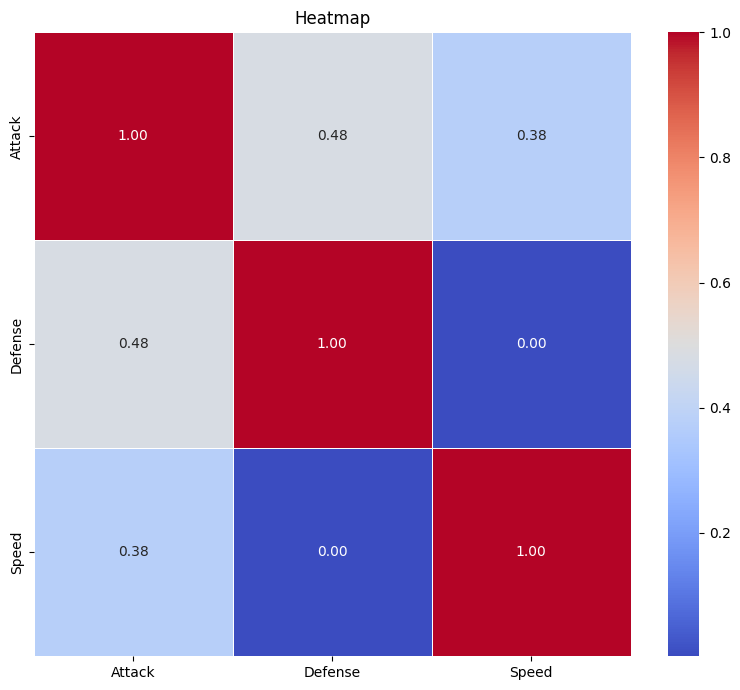

In [10]:
plt.figure(figsize=(8, 7))
sns.heatmap(
    correlacion_matrix,  
    annot=True,          
    cmap='coolwarm',     
                         
    fmt=".2f",           
    linewidths=.5,       
    cbar=True           
)
plt.title('Heatmap')
plt.tight_layout()
plt.show()

Pregunta 5: ¿Qué tipo (Primary Typing) tiene el mayor promedio de Attack?

In [11]:
average_attack_by_type = df_pokemon.groupby('Primary Typing')['Attack'].mean()
print("Promedio de Attack por tipo principal:")
print(average_attack_by_type)
print("\n" + "="*50 + "\n")

Promedio de Attack por tipo principal:
Primary Typing
bug          71.853933
dark         85.228070
dragon      105.979167
electric     72.042254
fairy        69.451613
fighting    104.960000
fire         84.415584
flying       79.888889
ghost        70.666667
grass        77.743363
ground       92.978261
ice          80.047619
normal       76.101562
poison       76.208333
psychic      74.740260
rock         91.112676
steel        91.232558
water        76.482759
Name: Attack, dtype: float64




In [12]:
type_with_highest_average_attack = average_attack_by_type.idxmax()
highest_average_attack_value = average_attack_by_type.max()
print(f"\nTipo con el mayor promedio de Attack:")
print(average_attack_by_type.sort_values(ascending=False).head(1))


Tipo con el mayor promedio de Attack:
Primary Typing
dragon    105.979167
Name: Attack, dtype: float64


Pregunta 6: Crear un histograma de la variable Speed

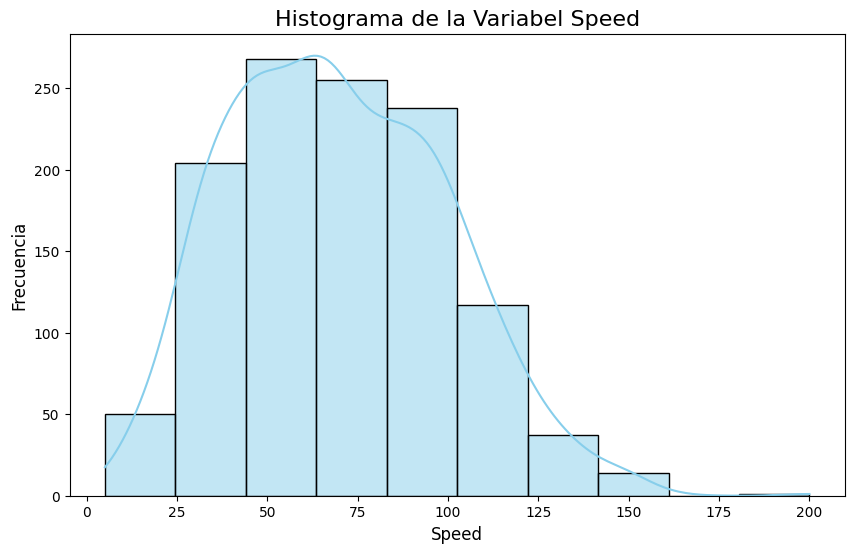

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df_pokemon['Speed'], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title('Histograma de la Variabel Speed', fontsize=16)
plt.xlabel('Speed', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

🔺 Nivel High (Avanzado)

Pregunta 7: ¿Qué pokemones tienen estadísticas totales (Base Stat Total) superiores al percentil 90? ¿Qué tipos predominan en este grupo?

In [ ]:
# Calcular el Base Stat Total si no existe
if 'Base Stat Total' not in df_pokemon.columns:
    df_pokemon['Base Stat Total'] = df_pokemon[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)

# 1. Calcular el percentil 90 del 'Base Stat Total'
percentile_90 = df_pokemon['Base Stat Total'].quantile(0.90)
print(f"El percentil 90 del Base Stat Total es: {percentile_90:.2f}")

# 2. Filtrar los Pokémon con estadísticas totales superiores al percentil 90
pokemon_top_10_percent = df_pokemon[df_pokemon['Base Stat Total'] > percentile_90]
print("\nPokémon con estadísticas totales superiores al percentil 90:")
print(pokemon_top_10_percent[['Name', 'Base Stat Total', 'Primary Typing', 'Secondary Typing']])

# Contar la frecuencia de cada tipo en 'Type 1'
type_1_counts = pokemon_top_10_percent['Primary Typing'].value_counts()

# Contar la frecuencia de cada tipo en 'Type 2' (manejar los valores NaN)
type_2_counts = pokemon_top_10_percent['Secondary Typing'].value_counts()

# Sumar las ocurrencias de ambos tipos para obtener una visión general
# Usamos .add(fill_value=0) para manejar los tipos que puedan existir solo en una de las columnas
dominant_types = type_1_counts.add(type_2_counts, fill_value=0).sort_values(ascending=False)

print("Tipos predominantes en el grupo con Base Stat Total superior al percentil 90:")
for pokemon_type, count in dominant_types.items():
    print(f"{pokemon_type}: {count:.0f}")

El percentil 90 del Base Stat Total es: 590.00

Pokémon con estadísticas totales superiores al percentil 90:
                    Name  Base Stat Total Primary Typing Secondary Typing
3          venusaur-mega              625          grass           poison
7       charizard-mega-x              634           fire           dragon
8       charizard-mega-y              634           fire           flying
12        blastoise-mega              630          water              NaN
87         alakazam-mega              600        psychic              NaN
...                  ...              ...            ...              ...
1161            miraidon              670       electric           dragon
1174          archaludon              600          steel           dragon
1181  terapagos-terastal              600         normal              NaN
1182   terapagos-stellar              700         normal              NaN
1183           pecharunt              600         poison            ghost

[1

Pregunta 8: Clasifica a los pokemones en tres categorías según su Base Stat Total: "Débil", "Normal" y "Fuerte". Luego, muestra la distribución de estas categorías en un gráfico de barras.

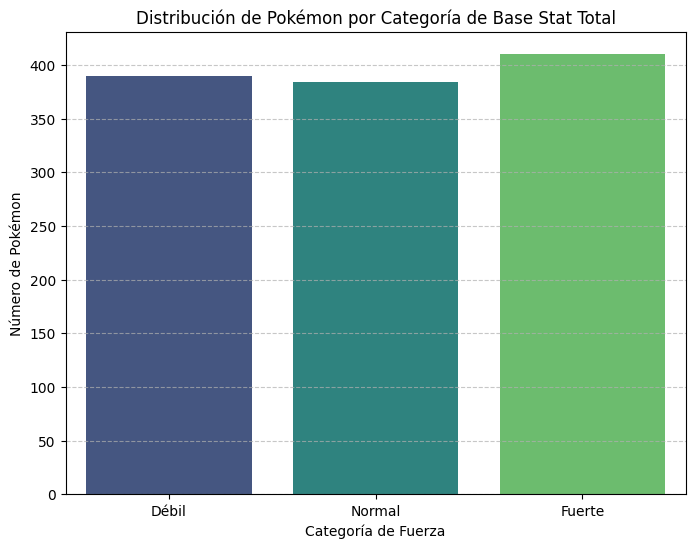

In [31]:
# Calcular el Base Stat Total si no existe
if 'Base Stat Total' not in df_pokemon.columns:
    df_pokemon['Base Stat Total'] = df_pokemon[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)

q_33 = df_pokemon['Base Stat Total'].quantile(0.33)
q_66 = df_pokemon['Base Stat Total'].quantile(0.66)

def categorize_pokemon(bst):
    if bst < q_33:
        return 'Débil'
    elif bst < q_66:
        return 'Normal'
    else:
        return 'Fuerte'

df_pokemon['Category'] = df_pokemon['Base Stat Total'].apply(categorize_pokemon)
# --- Fin del código previo ---


# 3. Crear el gráfico de barras con la sintaxis recomendada por Seaborn
plt.figure(figsize=(8, 6)) # Define el tamaño del gráfico

# La línea que debes cambiar es esta:
sns.countplot(x='Category', data=df_pokemon, order=['Débil', 'Normal', 'Fuerte'], palette='viridis', hue='Category', legend=False)

plt.title('Distribución de Pokémon por Categoría de Base Stat Total') # Título del gráfico
plt.xlabel('Categoría de Fuerza') # Etiqueta del eje X
plt.ylabel('Número de Pokémon') # Etiqueta del eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade una cuadrícula suave
plt.show() # Muestra el gráfico

Pregunta 9: Crear un pairplot de Attack, Defense, Speed y colorear por Legendary Status

<Figure size 1000x800 with 0 Axes>

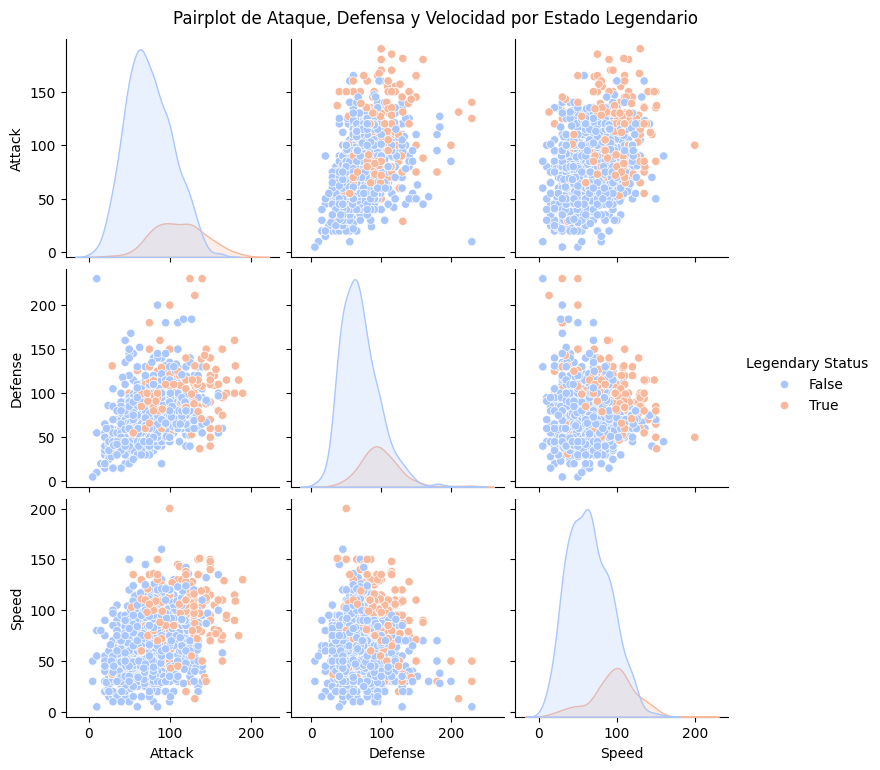

In [34]:
# Crear el pairplot
plt.figure(figsize=(10, 8)) # Ajusta el tamaño de la figura si es necesario

# sns.pairplot es la función clave
# vars: lista de columnas numéricas para incluir en el pairplot
# hue: columna categórica para colorear los puntos
# palette: esquema de colores a usar
# diag_kind: tipo de gráfico para la diagonal (kde para densidad, hist para histograma)
sns.pairplot(df_pokemon,
             vars=['Attack', 'Defense', 'Speed'],
             hue='Legendary Status',
             palette='coolwarm', # Otro buen esquema de colores para dos categorías
             diag_kind='kde') # 'kde' para mostrar la densidad de cada grupo en la diagonal

plt.suptitle('Pairplot de Ataque, Defensa y Velocidad por Estado Legendario', y=1.02) # Título general del pairplot
plt.show() # Muestra el gráfico